<a href="https://colab.research.google.com/github/keshavisha/TitanicSurvivalModel/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train = pd.read_csv('/content/train[1].csv')
test = pd.read_csv('/content/test[1].csv')

In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
#ASSUMPTIONS
#CABIN does not play a huge role in survival- thus, can be dropped  (it also has a lot of missing values)
#FARE, TICKET are also not important, can be dropped.
#AGE plays a huge role in survival; for eg. children and seniors are more likely to be helped, thus survive. AGE is thus, not dropped but missing values are filled.
#GENDER also plays an important role; women evacuted first; thus survived.

In [12]:
train = train.drop(['Cabin', 'Fare','Ticket'],axis = 1)
test = test.drop(['Cabin', 'Fare','Ticket'],axis = 1)

<Axes: xlabel='Sex', ylabel='Survived'>

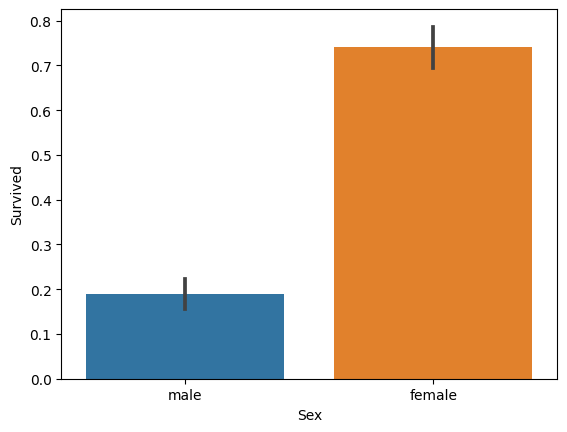

In [13]:
#GENDER
sns.barplot(x='Sex', y='Survived', data = train)

In [14]:
print('Percentage of women who survived: ', train['Survived'][train['Sex'] == 'female'].value_counts(normalize =True)[1]*100)
print('Percentage of men who survived: ', train['Survived'][train['Sex'] == 'male'].value_counts(normalize =True)[1]*100)

Percentage of women who survived:  74.20382165605095
Percentage of men who survived:  18.890814558058924


<Axes: xlabel='Pclass', ylabel='Survived'>

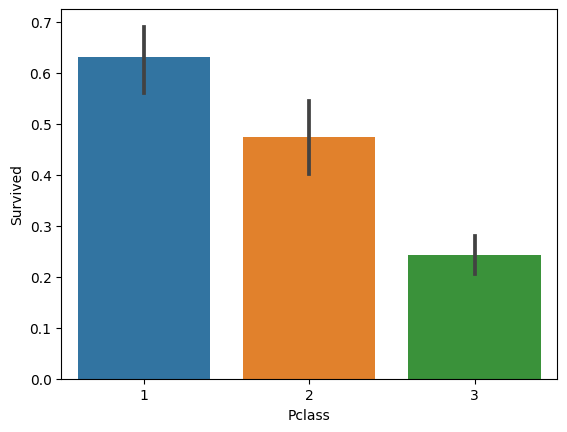

In [15]:
#Passenger Class
sns.barplot(x='Pclass', y = 'Survived', data = train)

In [16]:
print('Percentage of class 1 people who survived: ', train['Survived'][train['Pclass'] == 1].value_counts(normalize =True)[1]*100)
print('Percentage of class 2 people who survived: ', train['Survived'][train['Pclass'] == 2].value_counts(normalize =True)[1]*100)
print('Percentage of class 3 people who survived: ', train['Survived'][train['Pclass'] == 3].value_counts(normalize =True)[1]*100)

Percentage of class 1 people who survived:  62.96296296296296
Percentage of class 2 people who survived:  47.28260869565217
Percentage of class 3 people who survived:  24.236252545824847


In [17]:
#AGE
#filled missing values with -0.5
train.Age = train.Age.fillna(-0.5)
test.Age = test.Age.fillna(-0.5)

In [18]:
#Categorizing age data; since it is continuous
bin = [-1, 0, 5, 12, 20, 35, 60, np.inf]
labels = ['Unknown', 'Infants', 'Kids', 'Adolescents', 'Young Adults', 'Adults', 'Seniors']
#adding aditional column 
train['AgeGroup'] = pd.cut(train['Age'],bin,labels = labels)
test['AgeGroup'] = pd.cut(test['Age'],bin,labels = labels)

<Axes: xlabel='AgeGroup', ylabel='Survived'>

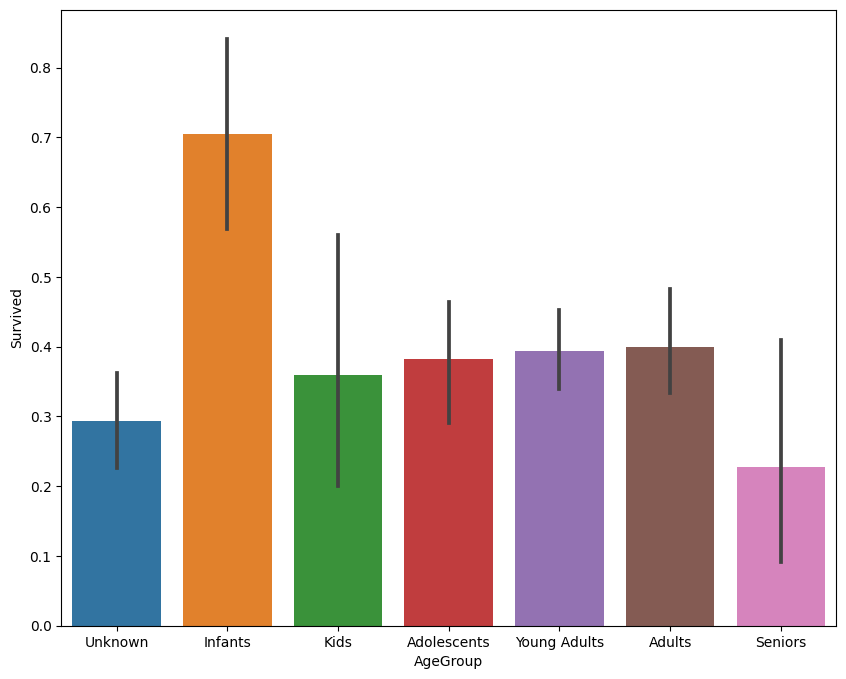

In [19]:
plt.figure(figsize=(10,8))
sns.barplot(x ='AgeGroup', y='Survived', data=train)

In [20]:
#Embarked
print('People embarked in Southampton (S): ', train[train['Embarked']=='S'].shape[0])
print('People embarked in Cherbourg (C): ', train[train['Embarked']=='C'].shape[0])
print('People embarked in Queenstown (Q): ', train[train['Embarked']=='Q'].shape[0])

People embarked in Southampton (S):  644
People embarked in Cherbourg (C):  168
People embarked in Queenstown (Q):  77


In [21]:
#Since, maximum people are from Southampton; missing values can be considered from Sounthampton too.  
#test data does not have any missing values in Embarked.
train.Embarked = train.Embarked.fillna('S')

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adults


In [23]:
#Replace the Unknown agegroup i.e. the missing values originally with genuine values:
  #Name dataset has initials like Mr., Mrs. and Miss; thus we create another column Initials with these.
  #Find the missing values corresponding to those initals.
  #Replace the missing values with mode of the corresponding initials.

In [24]:
combine = [train, test]


In [25]:
for dataset in combine:
  dataset['Initial'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
pd.crosstab(train['Initial'], train['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Young Adults,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adults,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adults,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adults,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adults,Mr


In [27]:
train['Initial'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Initial, dtype: int64

In [28]:
for dataset in combine:
  dataset['Initial'] = dataset['Initial'].replace(['Lady','Countess','Dona'],'Mrs')
  dataset['Initial'] = dataset['Initial'].replace(['Mlle','Ms'],'Miss')
  dataset['Initial'] = dataset['Initial'].replace(['Dr','Mme','Major','Col','Rev','Capt','Don','Jonkheer','Sir'], 'Rich Male Titles')

In [29]:
train['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rich Male Titles'], dtype=object)

In [30]:
initial_mapping = {'Mr': 1, 'Mrs':2, 'Miss':3, 'Master':4, 'Rich Male Titles':5}
for dataset in combine:
  dataset['Initial']= dataset['Initial'].map(initial_mapping)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,Young Adults,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,Adults,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,Young Adults,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,Young Adults,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,Young Adults,1


In [32]:
mr_mode = train[train['Initial']==1]['AgeGroup'].mode()
mrs_mode = train[train['Initial']==2]['AgeGroup'].mode()
miss_mode = train[train['Initial']==3]['AgeGroup'].mode()
master_mode = train[train['Initial']==4]['AgeGroup'].mode()
rich_mode = train[train['Initial']==5]['AgeGroup'].mode()
mr_mode, mrs_mode, miss_mode, master_mode, rich_mode 

(0    Young Adults
 Name: AgeGroup, dtype: category
 Categories (7, object): ['Unknown' < 'Infants' < 'Kids' < 'Adolescents' < 'Young Adults' < 'Adults' <
                          'Seniors'],
 0    Adults
 Name: AgeGroup, dtype: category
 Categories (7, object): ['Unknown' < 'Infants' < 'Kids' < 'Adolescents' < 'Young Adults' < 'Adults' <
                          'Seniors'],
 0    Young Adults
 Name: AgeGroup, dtype: category
 Categories (7, object): ['Unknown' < 'Infants' < 'Kids' < 'Adolescents' < 'Young Adults' < 'Adults' <
                          'Seniors'],
 0    Infants
 Name: AgeGroup, dtype: category
 Categories (7, object): ['Unknown' < 'Infants' < 'Kids' < 'Adolescents' < 'Young Adults' < 'Adults' <
                          'Seniors'],
 0    Adults
 Name: AgeGroup, dtype: category
 Categories (7, object): ['Unknown' < 'Infants' < 'Kids' < 'Adolescents' < 'Young Adults' < 'Adults' <
                          'Seniors'])

In [33]:
map_mode = {1:'Young Adults', 2:'Adults', 3:'Young Adults', 4:'Infants', 5:'Adults'}
for i in range(len(train['AgeGroup'])):
  if train['AgeGroup'][i] =='Unknown':
    train['AgeGroup'][i] = map_mode[train['Initial'][i]]
for i in range(len(test['AgeGroup'])):
  if test['AgeGroup'][i] =='Unknown':
    test['AgeGroup'][i] = map_mode[test['Initial'][i]]

In [34]:
train.AgeGroup.unique()

['Young Adults', 'Adults', 'Infants', 'Adolescents', 'Kids', 'Seniors']
Categories (7, object): ['Unknown' < 'Infants' < 'Kids' < 'Adolescents' < 'Young Adults' < 'Adults' <
                         'Seniors']

In [35]:
from sklearn.preprocessing import LabelEncoder 
transform = ['Sex', 'AgeGroup', 'Embarked']
encoder = LabelEncoder()
for i in transform:
  train[i] = encoder.fit_transform(train[i])
for i in transform:
  test[i] = encoder.fit_transform(test[i])


ML MODEL

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Initial
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,5,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,0,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,5,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,5,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,5,1


In [37]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,AgeGroup,Initial
0,892,3,"Kelly, Mr. James",1,34.5,0,0,1,5,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,2,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,1,4,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,2,5,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,2,5,2


In [38]:
df = pd.DataFrame(combine)

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [40]:
X_train = train.drop(['PassengerId','Name','Survived'], axis = 1)
Y_train = train['Survived']
X_test = test.drop(['PassengerId','Name'], axis = 1)

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, Y_train)
Y_test = lr.predict(X_test)

In [43]:
Y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

HYPERPARAMETER TUNING

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [54]:
classifiers = [DecisionTreeClassifier(random_state = 42),SVC(random_state = 42), RandomForestClassifier(random_state =42), LogisticRegression(random_state = 42), KNeighborsClassifier()]
dt = {"min_samples_split" : range(10,500,20),"max_depth": range(1,20,2)}
svc = {"kernel" : ["rbf"],"gamma": [0.001, 0.01, 0.1, 1],"C": [1,10,50,100,200,300,1000]}
rf= {"max_features": [1,3,10],"min_samples_split":[2,3,10],"min_samples_leaf":[1,3,10],"bootstrap":[False],"n_estimators":[100,300],"criterion":["gini"]}
lr = {"C":np.logspace(-3,3,7),"penalty": ["l2"], 'solver':['lbfgs'], 'max_iter':[3000]}
knn= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),"weights": ["uniform","distance"],"metric":["euclidean","manhattan"]}
classifier_parameters = [dt,svc,rf,lr,knn]

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

result_cv = []
best_estimators = []

for i in range(len(classifiers)):
    clf = GridSearchCV(classifiers[i], param_grid=classifier_parameters[i], cv=StratifiedKFold(n_splits=10), scoring="accuracy", n_jobs=-1, verbose=1)
    clf.fit(X_train, Y_train)
    result_cv.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(result_cv[i])


Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8316479400749064
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.8282896379525593
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8260424469413234
Fitting 10 folds for each of 7 candidates, totalling 70 fits
0.7934956304619225
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.8260549313358302


In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
vc = VotingClassifier(estimators = [("dt",best_estimators[0]),("rfc",best_estimators[2]),("lr",best_estimators[3])],voting = "soft", n_jobs = -1)
vc = vc.fit(X_train, Y_train)
print(accuracy_score(vc.predict(X_test),Y_test))

0.937799043062201
